In [310]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#need this line of code to see plots inside jupyter notebook
%matplotlib inline 
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import scipy.stats as st
from scipy import stats
from sklearn import datasets, linear_model
import seaborn as sns
table_csv_path = r"C:\Users\kippk\Documents\DataScience101_Docs\Project3_Data\Data_Only\housing_txt.csv"
df=pd.read_csv(table_csv_path, dtype={'FIPS':str})
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [311]:
#The null hypothesis states that there is no relationship between the two variables being studied (one variable does 
#not affect the other). Results are due to chance and are not significant in terms of supporting the 
#idea being investigated. 

#create array from column where CHAS ==1,CHAS==0, and whole datset
arr1 =df[df['CHAS'] == 1]['MEDV'].to_numpy()
arr2 =df[df['CHAS'] == 0]['MEDV'].to_numpy()
arr3=df['MEDV'].to_numpy()

mn1=round(arr1.mean(),2)
mn2=round(arr2.mean(),2)
mn3=round(arr3.mean(),2)
diff= round(mn1-mn2,2)

print(str(mn1) + " is the mean value of tracts that border the Charles River .")
print(str(mn2) +  " is the mean value of tracts that do not border the Charles River.")
print(str(mn3) + " is the mean of the entire datset")
print(str(diff) + " is the difference between tracts that border the Charles River and those that do not. ")

28.44 is the mean value of tracts that border the Charles River .
22.09 is the mean value of tracts that do not border the Charles River.
22.53 is the mean of the entire datset
6.35 is the difference between tracts that border the Charles River and those that do not. 


In [312]:
#A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the 
#null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). 
#Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

def t_one_sample(samp, mu = 0.0, alpha = 0.05):
    '''Function for two-sided one-sample t test'''
    t_stat = stats.ttest_1samp(samp, mu)
    scale = np.std(samp)
    loc = np.mean(samp)
    ci = stats.t.cdf(alpha/2, len(samp), loc=mu, scale=scale)
    print('Results of one-sample two-sided t test')
    print('Mean         = %4.3f' % loc)
    print('t-Statistic  = %4.3f' % t_stat[0])
    print('p-value      < %4.3e' % t_stat[1])
    print('On degrees of freedom = %4d' % (len(samp) - 1))
    print('Confidence Intervals for alpha =' + str(alpha))
    print('Lower =  %4.3f Upper = %4.3f' % (loc - ci, loc + ci))

print('T-test for properties bordering the Charles River') 
print('')
t_one_sample(arr1)
print('')
print('')
print('T-test for properties not bordering the Charles River') 
t_one_sample(arr2)

T-test for properties bordering the Charles River

Results of one-sample two-sided t test
Mean         = 28.440
t-Statistic  = 14.239
p-value      < 6.874e-16
On degrees of freedom =   34
Confidence Intervals for alpha =0.05
Lower =  27.939 Upper = 28.941


T-test for properties not bordering the Charles River
Results of one-sample two-sided t test
Mean         = 22.094
t-Statistic  = 54.294
p-value      < 1.283e-204
On degrees of freedom =  470
Confidence Intervals for alpha =0.05
Lower =  21.593 Upper = 22.595


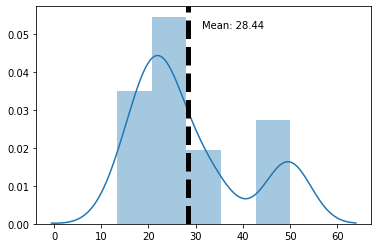

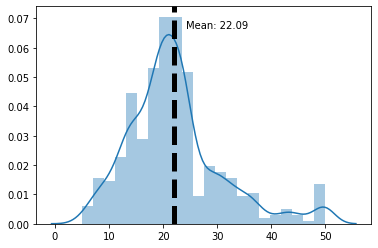

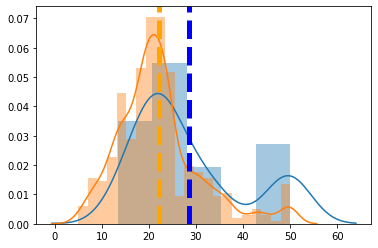

In [313]:
plot_distribution(arr1)
plot_distribution(arr2)
plt.figure()
ax1 = sns.distplot(arr1)
ax2 = sns.distplot(arr2)
plt.axvline(np.mean(arr1), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(arr2), color='orange', linestyle='dashed', linewidth=5)

In [315]:
#90% confidence interval for the target (price) of tracts that border the Charles River
#Calculate all the numbers we need according to the formula of confidence intervals.
m = arr1.mean() 
s = arr1.std() 
dof = len(x)-1 
confidence = 0.90
#calculate value of t;The function that calculates the inverse cumulative distribution is ppf. 
#We need to apply the absolute value because the cumulative distribution works with the left tail, 
#so the result would be negative
from scipy.stats import t
t_crit = np.abs(t.ppf((1-confidence)/2,dof))

#apply the formula to calculate the 95% confidence interval
print('Confidence Intervals for 90% ')
(round(m-s*t_crit/np.sqrt(len(x)),2), round(m+s*t_crit/np.sqrt(len(x)),2)) 

#with 90% confidence, the expected value of the population lies between 21.86 and 23.21.



Confidence Intervals for 90% 


(27.59, 29.29)

In [316]:
from statsmodels.stats.power import TTestIndPower
# Initiate the power analysis
power_analysis = TTestIndPower()
# Calculate sample size
sample_size = power_analysis.solve_power(effect_size = 0.6, alpha = 0.05, power = 0.8, alternative = 'two-sided')
# Print results
print('The sample size needed for each group is', round(sample_size))

The sample size needed for each group is 45


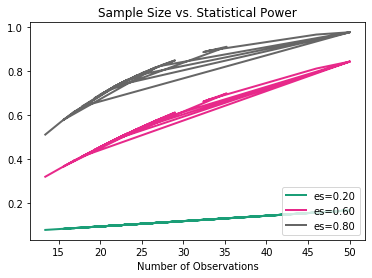

In [246]:
# Visualization; https://grabngoinfo.com/power-analysis-for-sample-size-using-python/
power_analysis.plot_power(dep_var='nobs',
                          nobs=arr1,
                          effect_size=np.array([0.2, 0.6, 0.8]),
                          alpha=0.05,
                          title='Sample Size vs. Statistical Power')
plt.show()